In [88]:
import pandas as pd

pd.set_option('display.max_columns', None)


from collections import Counter

import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6

import numpy as np

from collections import Counter

In [89]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2


In [90]:

#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler



from sklearn.model_selection import train_test_split

import lightgbm as lgb


#Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_fscore_support

from sklearn.pipeline import Pipeline

# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from statistics import mode
from sklearn.metrics import make_scorer

In [165]:
df = pd.read_csv("adult.csv")
df.shape

(32561, 15)

In [166]:
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')


In [167]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [168]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [169]:
df.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [170]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [172]:
print(Counter(df["salary"]))
print()

Counter({' <=50K': 24720, ' >50K': 7841})



In [173]:
24720 / 7841

3.152659099604642

In [187]:
def get_categorical_col_name_df(dataset): 
    return dataset.select_dtypes(include=['object']) #get all categorical columns only


categorical_col_name = list(get_categorical_col_name_df(df).columns)
categorical_col_name

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

# <font color ='orange' >  EDA

### <font color ='Green' > Step 1: Drop Id and check dataset(Missing value, Data Types: Int, Float, Categorical)

In [188]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [189]:
print(df.shape)


(32561, 15)


In [190]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    total_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            total_miss_value_column.append(i)
            print("Type ",dataset[i].dtype," Column-> " , i, ", missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
        
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : ", higher_miss_value_column)
    else:
        print("There are no Higher Column Missing values in Dataset")
    
    return total_miss_value_column, higher_miss_value_column

In [191]:
get_percentage_miss_value(df)





There are no Higher Column Missing values in Dataset


([], [])

In [192]:
def get_int_col_name_df(dataset): 
    return dataset.select_dtypes(include=['int']) #get all integer numerical columns only

get_int_col_name_df(df).head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [193]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            


In [194]:
check_cloumn_details_type_numberical(df)

Columns name :   age
{39: 816, 50: 602, 38: 827, 53: 464, 28: 867, 37: 858, 49: 577, 52: 478, 31: 888, 42: 780, 30: 861, 23: 877, 32: 828, 40: 794, 34: 886, 25: 841, 43: 770, 54: 415, 35: 876, 59: 355, 56: 366, 19: 712, 20: 753, 45: 734, 22: 765, 48: 543, 21: 720, 24: 798, 57: 358, 44: 724, 41: 808, 29: 813, 18: 550, 47: 708, 46: 737, 36: 898, 79: 22, 27: 835, 67: 151, 33: 875, 76: 46, 17: 395, 55: 419, 61: 300, 70: 89, 64: 208, 71: 72, 68: 120, 66: 150, 51: 595, 58: 366, 26: 785, 60: 312, 90: 43, 75: 45, 65: 178, 77: 29, 62: 258, 63: 230, 80: 22, 72: 67, 74: 51, 69: 108, 73: 64, 81: 20, 78: 23, 88: 3, 82: 12, 83: 6, 84: 10, 85: 3, 86: 1, 87: 1}
****************************************************************************************************


Columns name :   fnlwgt
{77516: 1, 83311: 2, 215646: 1, 234721: 1, 338409: 1, 284582: 1, 160187: 4, 209642: 1, 45781: 2, 159449: 3, 280464: 1, 141297: 2, 122272: 6, 205019: 1, 121772: 2, 245487: 3, 176756: 5, 186824: 6, 28887: 2, 292175: 1, 19

In [195]:
def get_float_col_name_df(dataset): 
    return dataset.select_dtypes(include=['float']) #get all float numerical columns only

# get_float_col_name_df(df)

In [196]:
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            


In [197]:
check_cloumn_details_type_float(df)

In [198]:
def get_categorical_col_name_df(dataset): 
    return dataset.select_dtypes(include=['object']) #get all categorical columns only


get_categorical_col_name_df(df)

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [199]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")
            

In [200]:
check_cloumn_details_type_categorical(df)

Columns name :   workclass
{' State-gov': 1298, ' Self-emp-not-inc': 2541, ' Private': 22696, ' Federal-gov': 960, ' Local-gov': 2093, ' ?': 1836, ' Self-emp-inc': 1116, ' Without-pay': 14, ' Never-worked': 7}
****************************************************************************************************


Columns name :   education
{' Bachelors': 5355, ' HS-grad': 10501, ' 11th': 1175, ' Masters': 1723, ' 9th': 514, ' Some-college': 7291, ' Assoc-acdm': 1067, ' Assoc-voc': 1382, ' 7th-8th': 646, ' Doctorate': 413, ' Prof-school': 576, ' 5th-6th': 333, ' 10th': 933, ' 1st-4th': 168, ' Preschool': 51, ' 12th': 433}
****************************************************************************************************


Columns name :   marital-status
{' Never-married': 10683, ' Married-civ-spouse': 14976, ' Divorced': 4443, ' Married-spouse-absent': 418, ' Separated': 1025, ' Married-AF-spouse': 23, ' Widowed': 993}
*********************************************************************

## <font color ='orange' >  found special symbol in dataset : ' ?'
    
" ?"

### <font color ='Green' > Step 2: Missing value: Treatment

In [201]:
df.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [202]:
df = df.replace(' ?', "UNKNOWN")

In [203]:
check_cloumn_details_type_categorical(df[["workclass", "occupation", "country"]])

Columns name :   workclass
{' State-gov': 1298, ' Self-emp-not-inc': 2541, ' Private': 22696, ' Federal-gov': 960, ' Local-gov': 2093, 'UNKNOWN': 1836, ' Self-emp-inc': 1116, ' Without-pay': 14, ' Never-worked': 7}
****************************************************************************************************


Columns name :   occupation
{' Adm-clerical': 3770, ' Exec-managerial': 4066, ' Handlers-cleaners': 1370, ' Prof-specialty': 4140, ' Other-service': 3295, ' Sales': 3650, ' Craft-repair': 4099, ' Transport-moving': 1597, ' Farming-fishing': 994, ' Machine-op-inspct': 2002, ' Tech-support': 928, 'UNKNOWN': 1843, ' Protective-serv': 649, ' Armed-Forces': 9, ' Priv-house-serv': 149}
****************************************************************************************************


Columns name :   country
{' United-States': 29170, ' Cuba': 95, ' Jamaica': 81, ' India': 100, 'UNKNOWN': 583, ' Mexico': 643, ' South': 80, ' Puerto-Rico': 114, ' Honduras': 13, ' England': 90, '

In [204]:
df.isna().sum().sum() # check overall missing value

0

### <font color ='Green' > Step 3: Checking and Handling Outliers, Standardization, Visualize

In [205]:
get_int_col_name_df(df).head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [206]:
get_int_col_name_df(df).describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [209]:
get_categorical_col_name_df(df).head(5)


,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [210]:
list(get_categorical_col_name_df(df))

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [211]:
categorical_col_name = list(get_categorical_col_name_df(df))
categorical_col_name

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [133]:
def visualize_categorical_values(dataset):
    no_of_columns = 3
    no_of_rows = 3
    
    columns_object_type = [i for i in dataset.columns  if dataset[i].dtype == "object"]
    total_rows = (len(columns_object_type) // no_of_rows ) + 1
    
    f, axes = plt.subplots(total_rows, no_of_columns, figsize=(18,34))

    for ind, val in enumerate(columns_object_type):
        sns.countplot(df[val] , ax = axes[ind // no_of_rows , ind %no_of_columns ])
    plt.show()   

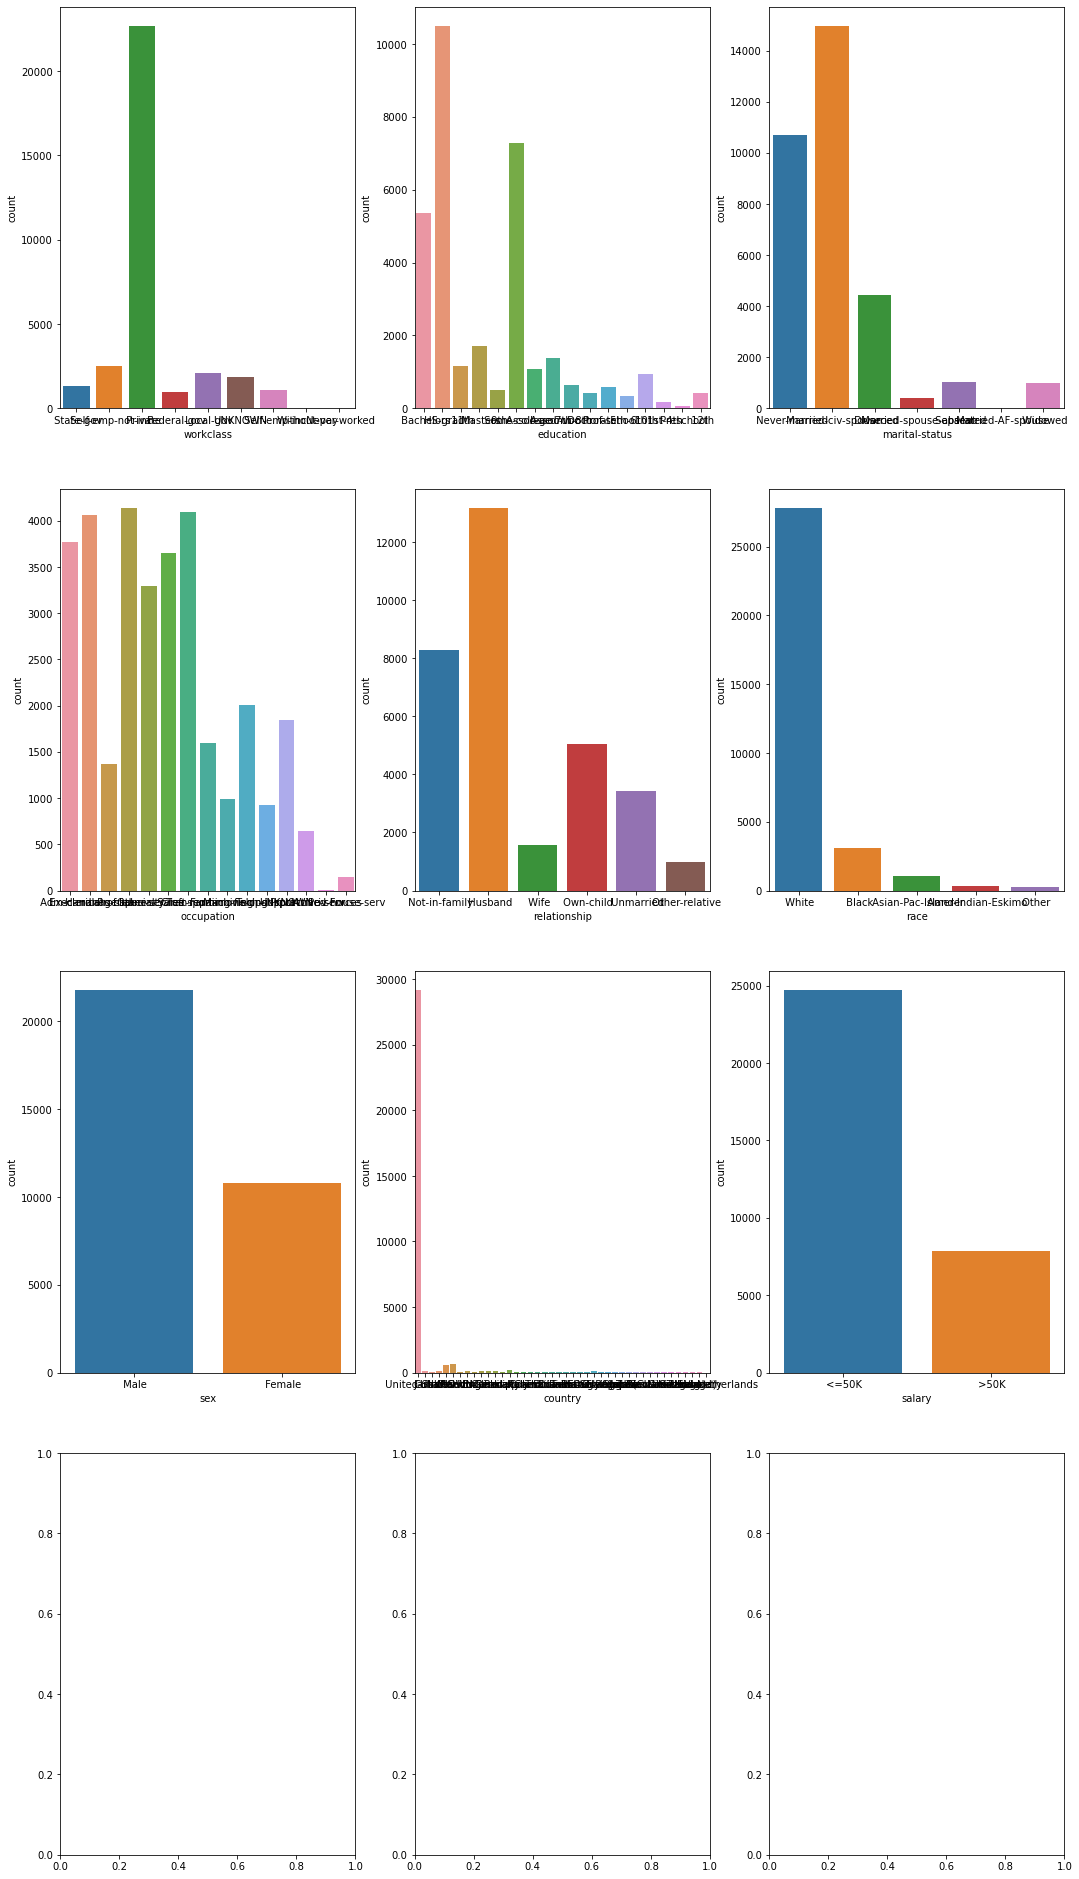

In [134]:
visualize_categorical_values(df)

In [135]:
def visualize_numberical_values(dataset):
    plt.figure(figsize=(18,34))
    sns.pairplot(df)
    plt.show() 

<Figure size 1296x2448 with 0 Axes>

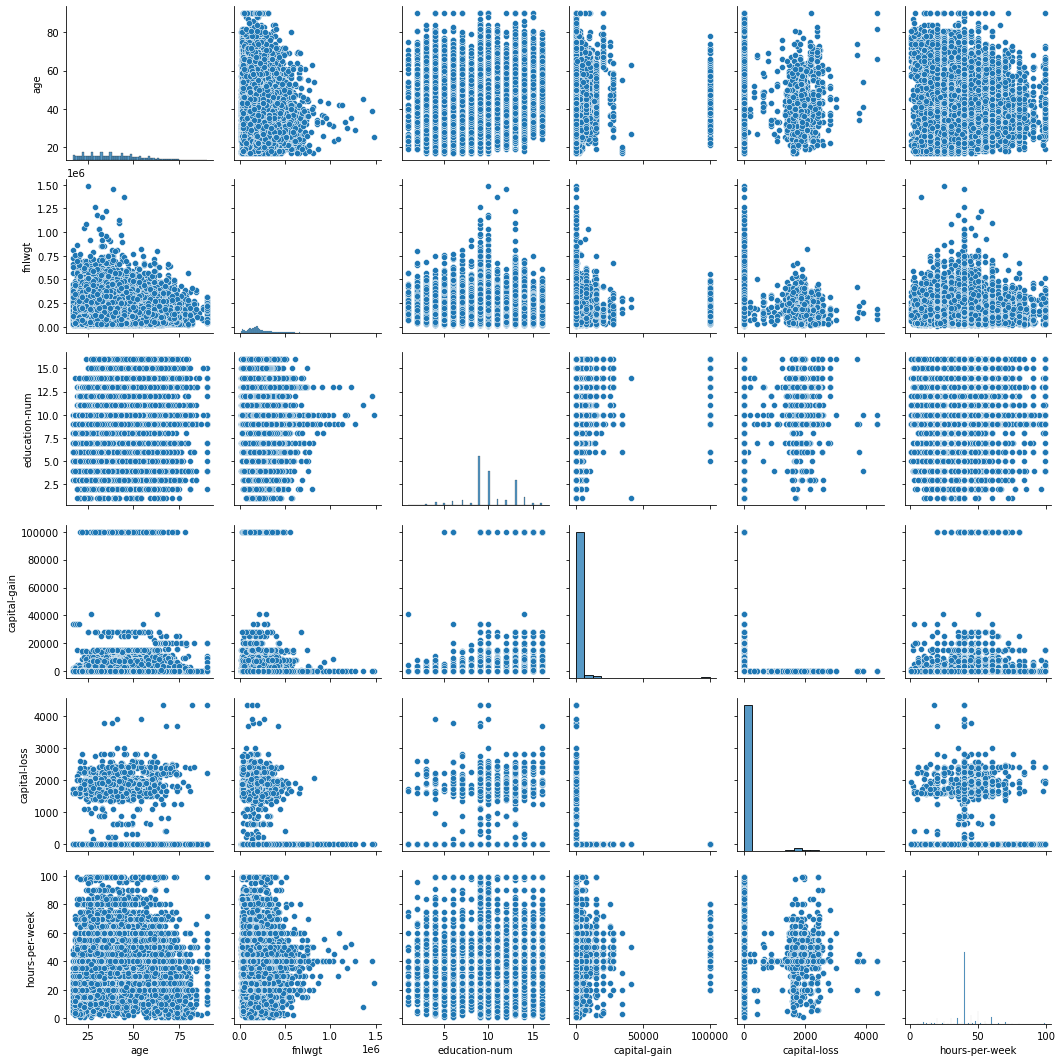

In [136]:
visualize_numberical_values(df)

In [139]:
df.shape

(32561, 15)

In [140]:
def visualize_histogram(dataset):
    # plot histogram
    plt.figure(figsize=(25, 9))  # figure size in ratio 16:9
    features = dataset.columns  # list of columns name
    for i, j in enumerate(features):
        plt.subplot(5, 3, i + 1)  # create subplot for histogram
        plt.title("Histogram of {}".format(j), fontsize=15)  # title of histogram

        bins = len(dataset[j].unique())  # bins for histogram
        plt.hist(dataset[j], bins=bins, rwidth=0.8, edgecolor="y", linewidth=2, )  # plot histogram

    plt.subplots_adjust(hspace=0.5)  # space between horixontal axes (subplots)

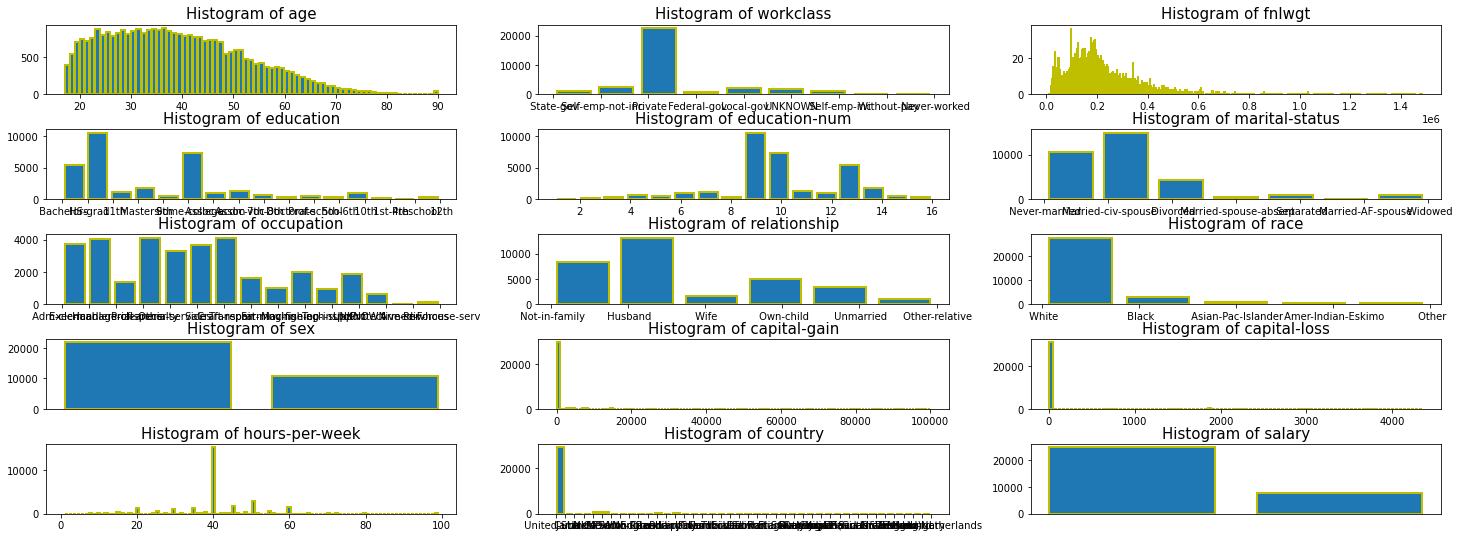

In [141]:
visualize_histogram(df)

In [142]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [212]:
print(Counter(df.salary))

Counter({' <=50K': 24720, ' >50K': 7841})


<AxesSubplot:xlabel='salary', ylabel='count'>

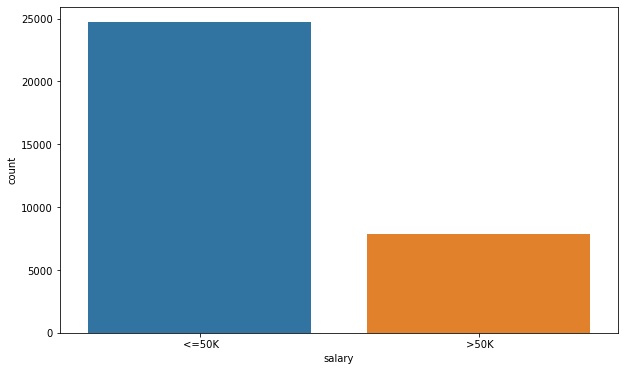

In [213]:
sns.countplot(df.salary)

In [214]:
def check_skewness_numerical(dataset,target):
    #analysing the distribution of HR Selection
    print('skew is', dataset[target].skew())   
    plt.hist(dataset[target], color= 'b')

    plt.title('Distribution of HR section YES / NO', fontsize = 24)
    plt.ylabel('observation', fontsize = 20)
    plt.xlabel('selection', fontsize = 20)

    plt.show()
    


In [216]:
# check_skewness_numerical(df , "salary")

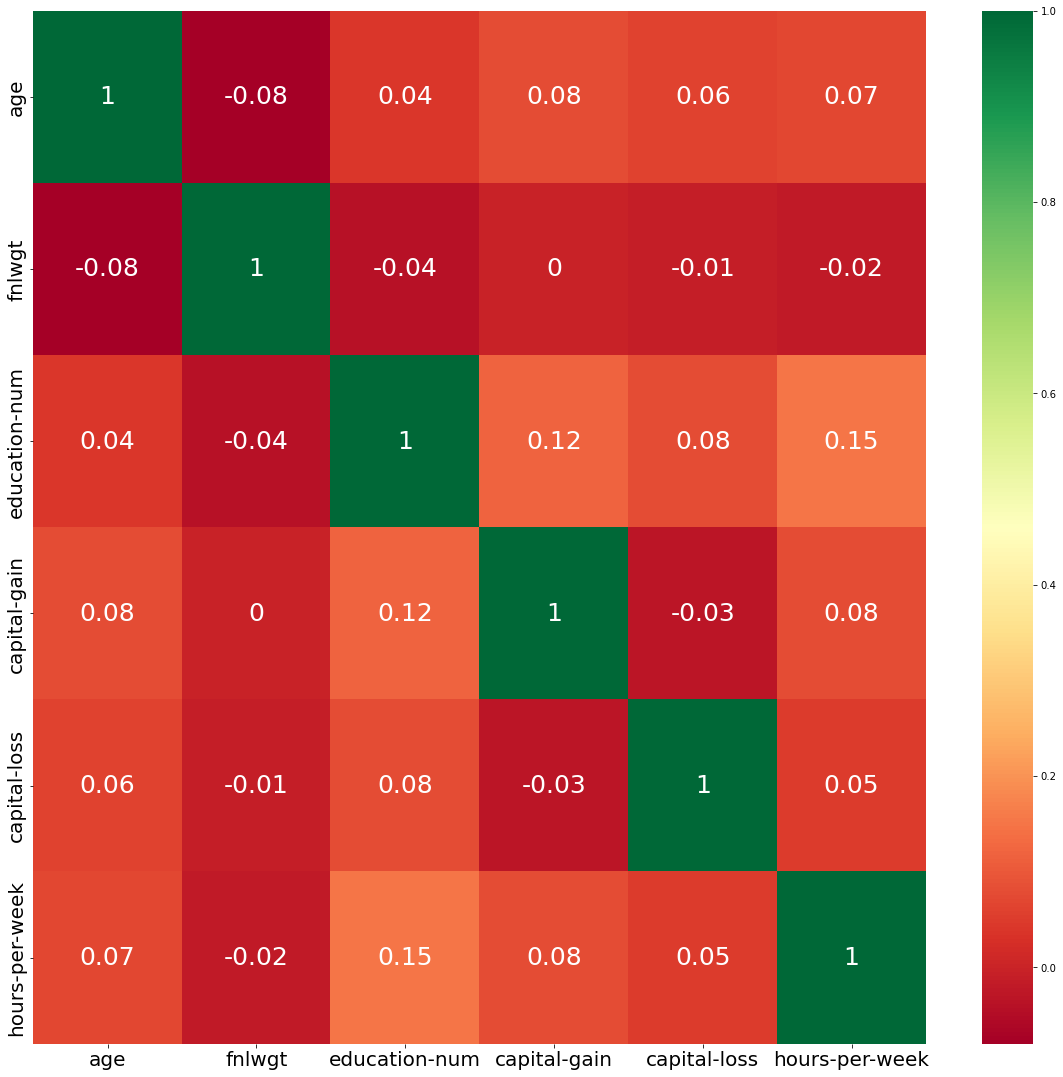

In [147]:
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 19))
sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 25})
ax.tick_params(labelsize=20)
plt.show()

In [217]:
def get_numercial_data_types_col_name(dataset):
    return list(dataset.select_dtypes(include =  ["int" , "float"] ).columns)

numberical_col = get_numercial_data_types_col_name(df)
numberical_col

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [218]:
check_cloumn_details_type_numberical(df)

Columns name :   age
{39: 816, 50: 602, 38: 827, 53: 464, 28: 867, 37: 858, 49: 577, 52: 478, 31: 888, 42: 780, 30: 861, 23: 877, 32: 828, 40: 794, 34: 886, 25: 841, 43: 770, 54: 415, 35: 876, 59: 355, 56: 366, 19: 712, 20: 753, 45: 734, 22: 765, 48: 543, 21: 720, 24: 798, 57: 358, 44: 724, 41: 808, 29: 813, 18: 550, 47: 708, 46: 737, 36: 898, 79: 22, 27: 835, 67: 151, 33: 875, 76: 46, 17: 395, 55: 419, 61: 300, 70: 89, 64: 208, 71: 72, 68: 120, 66: 150, 51: 595, 58: 366, 26: 785, 60: 312, 90: 43, 75: 45, 65: 178, 77: 29, 62: 258, 63: 230, 80: 22, 72: 67, 74: 51, 69: 108, 73: 64, 81: 20, 78: 23, 88: 3, 82: 12, 83: 6, 84: 10, 85: 3, 86: 1, 87: 1}
****************************************************************************************************


Columns name :   fnlwgt
{77516: 1, 83311: 2, 215646: 1, 234721: 1, 338409: 1, 284582: 1, 160187: 4, 209642: 1, 45781: 2, 159449: 3, 280464: 1, 141297: 2, 122272: 6, 205019: 1, 121772: 2, 245487: 3, 176756: 5, 186824: 6, 28887: 2, 292175: 1, 19

In [219]:
#Label encoding

def convert_to_numerical_datatype_train(dataset):
    enc = LabelEncoder()
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            dataset[i] = enc.fit_transform(dataset[i])
            
    return dataset

convert_to_numerical_datatype_train(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [72]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [222]:
df[categorical_col_name].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   workclass       32561 non-null  int64
 1   education       32561 non-null  int64
 2   marital-status  32561 non-null  int64
 3   occupation      32561 non-null  int64
 4   relationship    32561 non-null  int64
 5   race            32561 non-null  int64
 6   sex             32561 non-null  int64
 7   country         32561 non-null  int64
 8   salary          32561 non-null  int64
dtypes: int64(9)
memory usage: 2.2 MB


In [223]:
check_cloumn_details_type_numberical(df[categorical_col_name])

Columns name :   workclass
{6: 1298, 5: 2541, 3: 22696, 0: 960, 1: 2093, 8: 1836, 4: 1116, 7: 14, 2: 7}
****************************************************************************************************


Columns name :   education
{9: 5355, 11: 10501, 1: 1175, 12: 1723, 6: 514, 15: 7291, 7: 1067, 8: 1382, 5: 646, 10: 413, 14: 576, 4: 333, 0: 933, 3: 168, 13: 51, 2: 433}
****************************************************************************************************


Columns name :   marital-status
{4: 10683, 2: 14976, 0: 4443, 3: 418, 5: 1025, 1: 23, 6: 993}
****************************************************************************************************


Columns name :   occupation
{0: 3770, 3: 4066, 5: 1370, 9: 4140, 7: 3295, 11: 3650, 2: 4099, 13: 1597, 4: 994, 6: 2002, 12: 928, 14: 1843, 10: 649, 1: 9, 8: 149}
****************************************************************************************************


Columns name :   relationship
{1: 8305, 0: 13193, 5: 1568, 

# <font color ='red' > Scaling & Transform & Drop Outlier

In [ ]:
numberical_col = get_numercial_data_types_col_name(df)
numberical_col

In [225]:
numberical_col

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [226]:
numerical_col_name= ['age','fnlwgt','education-num', 'capital-gain','capital-loss','hours-per-week']


In [227]:
df[numerical_col_name]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [228]:
df[numerical_col_name].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [256]:
#not using

def standardscaler_preprocessing(dataset_train, dataset_test, num_col):
    scaler = StandardScaler()
   
    dataset_train[num_col] = scaler.fit_transform(dataset_train[num_col]) #also pass list or multiple column

    dataset_test[num_col] = scaler.transform(dataset_test[num_col])
    
    return dataset_train, dataset_test

In [84]:
# train_df, test_df = standardscaler_preprocessing(train_df, test_df, numerical_col_name)

In [232]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

# <font color ='green' > Imbalanced Dataset(Over Sampling) : Majority Classes

In [233]:
def majority_imbalanced_dataset(dataset, target_col):
    feature_columns = dataset.columns.tolist()
    feature_columns = [c for c in feature_columns if c not in [target_col]]

    X2_new = dataset[feature_columns]
    Y2_new = dataset[target_col]

    os =  RandomOverSampler(random_state=35)
    X_feature_variables , y_output = os.fit_sample(X2_new, Y2_new)
    
    X_feature_variables[target_col] = y_output
    
    X_feature_variables = X_feature_variables.sample(frac = 1).reset_index(drop = True)
    
    return X_feature_variables


print(Counter(df.salary))


Counter({0: 24720, 1: 7841})


In [234]:
df1 = majority_imbalanced_dataset(df.copy(), "salary")
print(Counter(df1.salary))

Counter({1: 24720, 0: 24720})


# <font color ='red' > Feature Engineering

In [236]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]


In [261]:
# splitting the data into training sets and testing set
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.20 , random_state = 10, stratify=y)

In [262]:
model1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 eval_metric='logloss',
 seed=27)

model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [263]:
accuracy_score(y_test, y_pred) , precision_score(y_test, y_pred) , recall_score(y_test, y_pred) , roc_auc_score(y_test, y_pred)

(0.9014967637540453, 0.872839969947408, 0.9399271844660194, 0.9014967637540452)

In [264]:
confusion_matrix(y_test, y_pred)

array([[4267,  677],
       [ 297, 4647]])

In [265]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
print("TP : ", TP,"FP : ", FP,"FN : ", TN,"TN : ", TN)

TP :  4267 FP :  677 FN :  4647 TN :  4647


In [286]:
def get_accuracy(y_train_val , y_pred_val , dataset_type = "Default"):
    
    print(" Model has biult in : ", dataset_type)
    
    accuracy = accuracy_score(y_train_val, y_pred_val)
    accuracy = round(accuracy, 4) * 100
    print("\n Accuracy Score     : ",accuracy)
    
    precision_accuracy = precision_score(y_train_val, y_pred_val)
    precision_accuracy = round(precision_accuracy, 4) * 100
    print("\n precision_accuracy : ",precision_accuracy)
    
    recall_accuracy = recall_score(y_train_val, y_pred_val)
    recall_accuracy = round(recall_accuracy, 4) * 100
    print("\n recall_accuracy    : ",recall_accuracy)
    
    roc_auc_accuracy = roc_auc_score(y_train_val, y_pred_val)
    roc_auc_accuracy = round(roc_auc_accuracy, 4) * 100
    print("\n roc_auc_accuracy   : ",roc_auc_accuracy)
    
    
    print("\n Confusion matrix   : ",roc_auc_accuracy)
    cm = confusion_matrix(y_train_val, y_pred_val)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    print("TP : ", TP,"FP : ", FP,"FN : ", TN,"TN : ", TN)
    

In [287]:
get_accuracy(y_test, y_pred )

 Model has biult in :  Default

 Accuracy Score     :  90.14999999999999

 precision_accuracy :  87.28

 recall_accuracy    :  93.99

 roc_auc_accuracy   :  90.14999999999999

 Confusion matrix   :  90.14999999999999
TP :  4267 FP :  677 FN :  4647 TN :  4647


In [293]:
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)


rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.30 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = accuracy_score(y_train, y_pred_train)
            train_acc = round(train_acc, 4) * 100
            
            test_acc = accuracy_score(y_test, y_pred)
            test_acc = round(test_acc, 4) * 100
            
            roc_auc_score_acc = roc_auc_score(y_test, y_pred)
            roc_auc_score_acc = round(roc_auc_score_acc, 4) * 100
            

            row = [names[j],   i,   train_acc, test_acc, roc_auc_score_acc]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    


In [294]:
names_regression = [ "LightGBM", "RF", "XGBoost" ]
algorithms = [ LGBMClassifier(), RandomForestClassifier(), XGBClassifier()]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc" , "roc_auc_score"]

random_state_list_up_to_10 = [1,2]


addRandomStateForAlgorithm(X,y,names_regression,algorithms,columns_name,random_state_list_up_to_10)

[17:30:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
      Model  Random_state  Train_acc  Test_acc  roc_auc_score
0  LightGBM             1      87.13     85.65          85.66
1  LightGBM             2      86.89     86.03          86.05
2        RF             1     100.00     92.17          92.18
3        RF             2     100.00     92.56          92.59
4   XGBoost             1      89.83     87.18          87.19
5   XGBoost             2      89.99     87.33          87.36


# <font color ='green' > Model 1: XGBoost


In [288]:
model_xgb = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 eval_metric='logloss',
 seed=27)

model_xgb.fit(X_train, y_train)
xgb_y_pred = model1.predict(X_test)



In [289]:
get_accuracy(y_test, xgb_y_pred , "XGB")

 Model has biult in :  XGB

 Accuracy Score     :  90.14999999999999

 precision_accuracy :  87.28

 recall_accuracy    :  93.99

 roc_auc_accuracy   :  90.14999999999999

 Confusion matrix   :  90.14999999999999
TP :  4267 FP :  677 FN :  4647 TN :  4647


# <font color ='green' > Model 2: LightGBM


In [296]:
# X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.05 , random_state = 10)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


params = {      'bagging_fraction': 0.9, #increased accuracy
                'bagging_freq': 500,
                'objective':'binary',
                'boosting_type':'gbdt',
                'metric':'auc',
                'n_jobs':-1,
                'learning_rate':0.01,
                'num_leaves': 2**8,
                'max_depth':-1,
                'metric': {'l2', 'l1'},
                'tree_learner':'serial',
                'colsample_bytree': 0.85,
                'subsample_freq':1,
                'subsample':0.85,
                'n_estimators':2**9,
                'max_bin':255,
                'verbose':-1,
                'seed': 42,
                'early_stopping_rounds':100,
                'reg_alpha':0.3,
                'reg_lamdba':0.243
            } 


print('Starting training...')
# train
# model_lgb = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=20,
#                 valid_sets=lgb_eval,
#                 early_stopping_rounds=5)


model_lgb = LGBMClassifier()



model_lgb.fit(X_train, y_train)
lgb_y_pred = model_lgb.predict(X_test)




Starting training...


In [297]:
get_accuracy(y_test, lgb_y_pred , "LightGB")


 Model has biult in :  LightGB

 Accuracy Score     :  86.5

 precision_accuracy :  83.99

 recall_accuracy    :  90.19

 roc_auc_accuracy   :  86.5

 Confusion matrix   :  86.5
TP :  4094 FP :  850 FN :  4459 TN :  4459


# <font color ='green' > Model 3: Random Forest


In [298]:
model_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)



model_rf.fit(X_train, y_train)
rf_y_pred = model_rf.predict(X_test)

In [299]:
get_accuracy(y_test, rf_y_pred , "RF")


 Model has biult in :  RF

 Accuracy Score     :  93.51

 precision_accuracy :  90.03999999999999

 recall_accuracy    :  97.84

 roc_auc_accuracy   :  93.51

 Confusion matrix   :  93.51
TP :  4409 FP :  535 FN :  4837 TN :  4837


# <font color ='green' > Model 4: CatBoost

In [300]:
model_catBoost= CatBoostClassifier(depth= 3,l2_leaf_reg= 1e-25,learning_rate= 0.07, n_estimators= 200)

model_catBoost.fit(X_train, y_train)


cat_boost_y_pred = model_catBoost.predict(X_test)

0:	learn: 0.6557647	total: 6.46ms	remaining: 1.28s
1:	learn: 0.6273869	total: 10.4ms	remaining: 1.03s
2:	learn: 0.6006280	total: 14.1ms	remaining: 927ms
3:	learn: 0.5801106	total: 22.5ms	remaining: 1.1s
4:	learn: 0.5628965	total: 26.4ms	remaining: 1.03s
5:	learn: 0.5451048	total: 30.1ms	remaining: 973ms
6:	learn: 0.5308381	total: 35.9ms	remaining: 989ms
7:	learn: 0.5190696	total: 42ms	remaining: 1.01s
8:	learn: 0.5098251	total: 45.8ms	remaining: 973ms
9:	learn: 0.5028344	total: 50.9ms	remaining: 968ms
10:	learn: 0.4955823	total: 55.8ms	remaining: 959ms
11:	learn: 0.4859747	total: 60ms	remaining: 940ms
12:	learn: 0.4800148	total: 63.7ms	remaining: 916ms
13:	learn: 0.4730136	total: 67.8ms	remaining: 901ms
14:	learn: 0.4676494	total: 71.9ms	remaining: 887ms
15:	learn: 0.4632578	total: 75.8ms	remaining: 872ms
16:	learn: 0.4593469	total: 80.1ms	remaining: 863ms
17:	learn: 0.4556324	total: 83.8ms	remaining: 847ms
18:	learn: 0.4513039	total: 87.8ms	remaining: 836ms
19:	learn: 0.4479643	total:

185:	learn: 0.3469017	total: 795ms	remaining: 59.8ms
186:	learn: 0.3468179	total: 799ms	remaining: 55.6ms
187:	learn: 0.3466915	total: 809ms	remaining: 51.6ms
188:	learn: 0.3466135	total: 814ms	remaining: 47.4ms
189:	learn: 0.3464974	total: 820ms	remaining: 43.2ms
190:	learn: 0.3463833	total: 826ms	remaining: 38.9ms
191:	learn: 0.3462456	total: 831ms	remaining: 34.6ms
192:	learn: 0.3461594	total: 835ms	remaining: 30.3ms
193:	learn: 0.3460668	total: 842ms	remaining: 26ms
194:	learn: 0.3459423	total: 845ms	remaining: 21.7ms
195:	learn: 0.3457475	total: 849ms	remaining: 17.3ms
196:	learn: 0.3456281	total: 854ms	remaining: 13ms
197:	learn: 0.3455379	total: 860ms	remaining: 8.68ms
198:	learn: 0.3454450	total: 863ms	remaining: 4.34ms
199:	learn: 0.3453699	total: 869ms	remaining: 0us


In [301]:
get_accuracy(y_test, cat_boost_y_pred , "Cat_boost")


 Model has biult in :  Cat_boost

 Accuracy Score     :  84.46000000000001

 precision_accuracy :  82.45

 recall_accuracy    :  87.53999999999999

 roc_auc_accuracy   :  84.46000000000001

 Confusion matrix   :  84.46000000000001
TP :  4023 FP :  921 FN :  4328 TN :  4328


# <font color ='green' > Model 4: Deep Learning

In [314]:
#Modle Selection
from sklearn.model_selection import train_test_split, cross_val_score

#Evaluation Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score, explained_variance_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_fscore_support
from sklearn.metrics import fbeta_score, make_scorer
from mlxtend.plotting import plot_confusion_matrix


from tensorflow.keras.models import Sequential, load_model, Model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.layers import ZeroPadding2D, BatchNormalization, AveragePooling2D, Input, Lambda
from tensorflow.keras.layers import Embedding,Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Dense, Activation, MaxPooling1D

In [315]:
model_dl = Sequential()
model_dl.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1])) #X.shape[1] : column(no of columns)
model_dl.add(Dense(128, activation='relu'))
model_dl.add(Dense(1, activation = 'sigmoid'))

model_dl.summary()


model_dl.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

model_dl.fit(X_train, y_train.to_numpy(), batch_size = 70, epochs = 5, verbose = 1)


dl_y_pred = model_dl.predict_classes(X_test)


print(y_pred)
print(y_test)


model_dl.evaluate(X_test, y_test.to_numpy())


confusion_matrix(y_test, dl_y_pred)
# pd.crosstab(y_test, y_pred)

accuracy_score(y_test, dl_y_pred)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1920      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
566/566 [==============================] - 1s 1ms/step - loss: 132.3582 - accuracy: 0.5590
Epoch 2/5
566/566 [==============================] - 1s 1ms/step - loss: 62.6461 - accuracy: 0.5638
Epoch 3/5
566/566 [==============================] - 1s 1ms/step - loss: 46.8632 - accuracy: 0.5610
Epoch 4/5
566/566 [==============================] - 1s 1ms/step - loss: 32.7917 

0.5

In [316]:
get_accuracy(y_test, dl_y_pred , "DL")


 Model has biult in :  DL

 Accuracy Score     :  50.0

 precision_accuracy :  50.0

 recall_accuracy    :  100.0

 roc_auc_accuracy   :  50.0

 Confusion matrix   :  50.0
TP :  0 FP :  4944 FN :  4944 TN :  4944


# <font color ='Yellow' > Final All Base Model

In [302]:
get_accuracy(y_test, rf_y_pred , "RF")


 Model has biult in :  RF

 Accuracy Score     :  93.51

 precision_accuracy :  90.03999999999999

 recall_accuracy    :  97.84

 roc_auc_accuracy   :  93.51

 Confusion matrix   :  93.51
TP :  4409 FP :  535 FN :  4837 TN :  4837


In [303]:
get_accuracy(y_test, xgb_y_pred , "XGB")

 Model has biult in :  XGB

 Accuracy Score     :  90.14999999999999

 precision_accuracy :  87.28

 recall_accuracy    :  93.99

 roc_auc_accuracy   :  90.14999999999999

 Confusion matrix   :  90.14999999999999
TP :  4267 FP :  677 FN :  4647 TN :  4647


In [304]:
get_accuracy(y_test, lgb_y_pred , "LightGB")

 Model has biult in :  LightGB

 Accuracy Score     :  86.5

 precision_accuracy :  83.99

 recall_accuracy    :  90.19

 roc_auc_accuracy   :  86.5

 Confusion matrix   :  86.5
TP :  4094 FP :  850 FN :  4459 TN :  4459


In [305]:
get_accuracy(y_test, cat_boost_y_pred , "Cat_boost")


 Model has biult in :  Cat_boost

 Accuracy Score     :  84.46000000000001

 precision_accuracy :  82.45

 recall_accuracy    :  87.53999999999999

 roc_auc_accuracy   :  84.46000000000001

 Confusion matrix   :  84.46000000000001
TP :  4023 FP :  921 FN :  4328 TN :  4328
